# Data Exploration - Absoulte und relative Endpunkte
## Imports

In [16]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Helpers

colors = {0:'tab:blue',1:'tab:orange',2:'tab:green'}
sns.set_style("whitegrid")

In [17]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)

df = pd.read_pickle("data.pickle")

In [18]:
#Create a new Datafram for start and endpoints of spiral search only
start_end_points = Helpers.get_dataframe_for_start_end_points()

#Create a new Datafram for start and endpoints of spiral search only
absolute_start_end_points = Helpers.get_dataframe_for_start_end_points()

## Absolute Endpunkte (run 0)
Wir betrachten zunächst die absoluten Start- und Endpunkte der Spiralsuche für run 0.

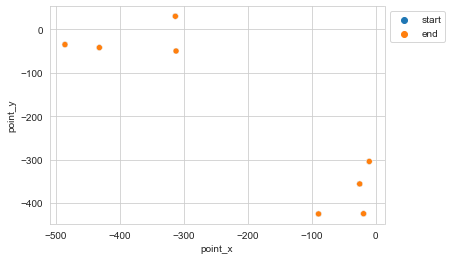

In [19]:
# Starting and endpoints of run 0 - Spiral search only - absolute values for 8 components

# Get data of run 0
run_0_df = df[df['run'] == 0.0]
# Clear dataframe
absolute_start_end_points = absolute_start_end_points.iloc[0:0]
# Iterate over Components (1 component has 3 segments)
for i in range(int(len(run_0_df["segment"].unique())/3)):
    #print("i: " + str(i))
    for index, seg in enumerate(run_0_df["segment"].unique()[i*3:(i+1)*3]):#[0:i*3]):
        if not index%3 == 2:
            continue
        #print("-----")
        #print(str(index) + ", " + str(index%3) + ", Seg: " + str(seg))
        t = run_0_df[run_0_df["segment"]==seg]

        new_row_start = {'run':'0', 'segment':seg, 'component':i+1, 'start_or_end':'start', 'point_x':t["pos_x"].iloc[0], 'point_y':t["pos_y"].iloc[0], 'point_z':t["pos_z"].iloc[0]}
        new_row_end = {'run':'0', 'segment':seg, 'component':i+1, 'start_or_end':'end', 'point_x':t["pos_x"].iloc[-1], 'point_y':t["pos_y"].iloc[-1], 'point_z':t["pos_z"].iloc[-1]}

        absolute_start_end_points = absolute_start_end_points.append(new_row_start, ignore_index=True)
        absolute_start_end_points = absolute_start_end_points.append(new_row_end, ignore_index=True)

sns_plot = sns.scatterplot(data=absolute_start_end_points, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

In dem Plot sind alle Start- und Endpunkte vom run 0 Dargestellt. Da die Spiralsuche sich jedoch nur in einem sehr kleinen Bereich abspielt, werden die Startpunkte (blau) von den jeweiligen Endpunkten (orange) verdeckt.
Im Folgenden betrachten wir daher die relativen Endpunkte und setzen den Startpunkt auf den Ursprung (0,0).

## Relative Endpunkte


In [20]:
# Starting and endpoints of all runs - Spiral search only - relative (delta) values
# Clear dataframe
start_end_points = start_end_points.iloc[0:0]
for run in df['run'].unique():

    df_run = df[df["run"] == run]

    # Iterate over Components (1 component has 3 segments)
    for i in range(int(len(df_run["segment"].unique())/3)):
        #print("i: " + str(i))
        for index, seg in enumerate(df_run["segment"].unique()[i*3:(i+1)*3]):#[0:i*3]):
            if not index%3 == 2:
                continue
            #print("-----")
            #print(str(index) + ", " + str(index%3) + ", Seg: " + str(seg))
            t = df_run[df_run["segment"]==seg]

            # We set the startpoint as 0,0,0 for x,y and z direction
            new_row_start = {'run':run, 'segment':seg, 'component':i+1, 'start_or_end':'start', 'point_x':0, 'point_y':0, 'point_z':0}
            # We now calculate the relative endpoint value by subtracting the startponit form the endpoint separately for x,y and z direction.
            new_row_end = {'run':run, 'segment':seg, 'component':i+1, 'start_or_end':'end', 'point_x':t["pos_x"].iloc[-1]-t["pos_x"].iloc[0], 'point_y':t["pos_y"].iloc[-1]-t["pos_y"].iloc[0], 'point_z':t["pos_z"].iloc[-1]-t["pos_z"].iloc[0]}

            start_end_points = start_end_points.append(new_row_start, ignore_index=True)
            start_end_points = start_end_points.append(new_row_end, ignore_index=True)

### Ein Durchlauf (run 0)
Wir betrachten zunächst die relativen Endpunkte für einen Durchlauf (run 0).

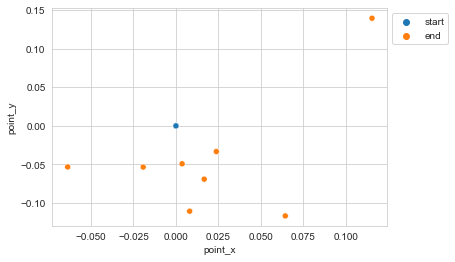

In [21]:
sns_plot = sns.scatterplot(data=start_end_points[start_end_points["run"] == 0.0], x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

Dieser Plot zeigt, dass die überwiegende Mehrheit der Endpunkte im unteren (linken) Feld, also in negativer y-Richtung ausgehend vom Startpunkt (0,0) liegt. Die Spiralsuche könnte somit, zumindest für diesen Durchlauf (run 0), beschleunigt werden, in dem ein negatives y-Offset hinzugefügt und damit der Startpunkt in negative y-Richtung verschoben wird.

### Alle Durchläufe

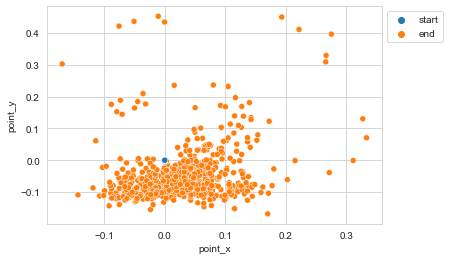

In [22]:
sns_plot = sns.scatterplot(data=start_end_points, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

Wenn wir nun neben run 0 auch alle weiteren Durchläufe mit einbeziehen, so wird noch deutlicher, dass derStartpunkt der Spiralsuche nicht optimal liegt. Hier verdeutlicht sich unsere Vermutung, dass der Startpunkt tendentiell zu weit in positiver y-Richtung liegt und es daher besser wäre, im Sinne einer Beschleunigung der Spiralsuche, wenn man diesen in negative y-Richtung verschieben würde.
